In [ ]:
# source : #https://towardsdatascience.com/hello-world-in-tensorflow-973e6c38e8ed
# tensorflow with iris_data 

    

In [1]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from ipykernel import kernelapp as app

#read data from csv
train_data = pd.read_csv('iris_train.csv',names=['f1','f2','f3','f4','f5'])
test_data = pd.read_csv('iris_test.csv',names=['f1','f2','f3','f4','f5'])

In [2]:
#encode results to onehot

train_data['f5'] = train_data['f5'].map({0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]})
test_data['f5'] = test_data['f5'].map({0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]})

                                      
                                      
#separate train data

train_x = train_data[['f1','f2','f3','f4']]
train_y = train_data.ix[:,'f5']

#separate test data
test_x = test_data[['f1','f2','f3','f4']]
test_y = test_data.ix[:,'f5']


/home/sachin/.virtualenvs/keras_tf_p3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/home/sachin/.virtualenvs/keras_tf_p3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [3]:
#placeholders for inputs and outputs
X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 3])

#Weight and bias
weight = tf.Variable(tf.zeros([4,3]))
bias = tf.Variable(tf.zeros([3]))



In [4]:
#output after going activation function 
output = tf.nn.softmax(tf.matmul(X,weight) + bias)
#cost function
cost = tf.reduce_mean(tf.square(Y-output))
#train model
train = tf.train.AdamOptimizer(0.01).minimize(cost)


In [5]:
#check sucess and failures
success = tf.equal(tf.argmax(output, 1 ), tf.argmax(Y,1))
#calculate accuracy
accuracy = tf.reduce_mean(tf.cast(success, tf.float32)) * 100

#initialize variables
init = tf.global_variables_initializer()

In [6]:
#start the tensorflow session

with tf.Session() as sess: 
    costs = []
    sess.run(init)
    # train the model 1000 times
    for i in range(1000):
        _,c = sess.run([train, cost], {X: train_x, Y: [t for t in train_y.values]})
        costs.append(c)
        
    print('Training finished')

Training finished


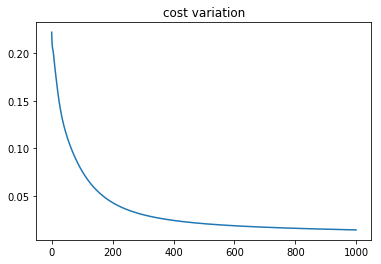

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [7]:
#plot cost graph 
plt.plot(range(1000),costs)
plt.title('cost variation')
plt.show()

print('Accuracy : %2f' %accuracy.eval({X: test_x, Y: [t for t in test_y.values]}))


